In [8]:
from pandas import DataFrame
import torch.nn as nn


from MyModule import (
    load_data, 
    load_vocab, 
    train_model_with_validation, 
    test_model_comprehensive, 
    plot_training_curves,
    print_training_summary,
    BowDataset
)

train_data = load_data("train_indexed.txt", sep=",", is_indexed=True)
val_data = load_data("val_indexed.txt", sep=",", is_indexed=True)
test_data = load_data("test_indexed.txt", sep=",", is_indexed=True)

# 加载数据
train_dataset = BowDataset(train_data)
val_dataset = BowDataset(val_data)
test_dataset = BowDataset(test_data)

vocab = load_vocab("vocab.txt")

In [2]:
import numpy as np
import torch

def load_pretrained_embeddings(embedding_path, vocab, embedding_dim=200):
    """根据已有 vocab 构建嵌入矩阵"""
    embeddings = np.random.normal(scale=0.6, size=(len(vocab), embedding_dim))  # 随机初始化
    with open(embedding_path, 'r', encoding='utf-8', errors='ignore') as f:
        for line in f:
            parts = line.strip().split()
            word = parts[0]
            vector = np.array(parts[1:], dtype='float32')
            if word in vocab.token_to_idx:
                embeddings[vocab[word]] = vector
    return torch.tensor(embeddings, dtype=torch.float32)

embedding_matrix = load_pretrained_embeddings("Word2Vec-100000-small.txt", vocab, embedding_dim=200)

In [4]:
from torch.utils.data import DataLoader
from MyModule import MLP, collate_fn_mlp

# 超参数设置
embedding_dim = 200
num_class = 3
hidden_dim = 256
batch_size = 32
num_epoch = 10


train_data_loader_mlp = DataLoader(train_dataset, batch_size=batch_size, collate_fn=collate_fn_mlp, shuffle=True)
val_data_loader_mlp = DataLoader(val_dataset, batch_size=batch_size, collate_fn=collate_fn_mlp, shuffle=False)
test_data_loader_mlp = DataLoader(test_dataset, batch_size=1, collate_fn=collate_fn_mlp, shuffle=False)

# 加载模型
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
mlp_pre_emb = MLP(len(vocab), embedding_dim, hidden_dim, num_class, pretrained_embedding_matrix=embedding_matrix.clone().detach())
mlp_pre_emb.to(device)

MLP(
  (embeddingbag): EmbeddingBag(33152, 200, mode='mean')
  (embedding): Embedding(33152, 200)
  (linear1): Linear(in_features=200, out_features=256, bias=True)
  (linear2): Linear(in_features=256, out_features=3, bias=True)
)

In [ ]:

# 训练过程
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mlp_pre_emb.parameters(), lr=0.001)

mlp_history = train_model_with_validation(
    model=mlp_pre_emb,
    train_loader=train_data_loader_mlp,
    val_loader=val_data_loader_mlp,
    criterion=criterion,
    optimizer=optimizer,
    num_epochs=num_epoch,
    device=device
)


Training Epoch 1: 100%|██████████| 7155/7155 [00:30<00:00, 233.29it/s]


Epoch 1/10
    Train Loss: 0.6982	Train Accuracy: 0.7027
    Valid Loss: 0.6313	Valid Accuracy: 0.7350
    Valid Precision: 0.7193	Valid Recall: 0.7350	Valid F1: 0.7220
--------------------------------------------------------------------------------


Training Epoch 2: 100%|██████████| 7155/7155 [00:29<00:00, 239.29it/s]


Epoch 2/10
    Train Loss: 0.5709	Train Accuracy: 0.7634
    Valid Loss: 0.6141	Valid Accuracy: 0.7447
    Valid Precision: 0.7297	Valid Recall: 0.7447	Valid F1: 0.7304
--------------------------------------------------------------------------------


Training Epoch 3: 100%|██████████| 7155/7155 [00:29<00:00, 238.81it/s]


Epoch 3/10
    Train Loss: 0.5146	Train Accuracy: 0.7890
    Valid Loss: 0.6208	Valid Accuracy: 0.7457
    Valid Precision: 0.7357	Valid Recall: 0.7457	Valid F1: 0.7379
--------------------------------------------------------------------------------


Training Epoch 4: 100%|██████████| 7155/7155 [00:30<00:00, 238.45it/s]


Epoch 4/10
    Train Loss: 0.4661	Train Accuracy: 0.8108
    Valid Loss: 0.6445	Valid Accuracy: 0.7417
    Valid Precision: 0.7402	Valid Recall: 0.7417	Valid F1: 0.7405
--------------------------------------------------------------------------------


Training Epoch 5: 100%|██████████| 7155/7155 [00:29<00:00, 238.96it/s]


Epoch 5/10
    Train Loss: 0.4141	Train Accuracy: 0.8348
    Valid Loss: 0.6771	Valid Accuracy: 0.7433
    Valid Precision: 0.7338	Valid Recall: 0.7433	Valid F1: 0.7372
--------------------------------------------------------------------------------


Training Epoch 6: 100%|██████████| 7155/7155 [00:29<00:00, 239.68it/s]


Epoch 6/10
    Train Loss: 0.3580	Train Accuracy: 0.8604
    Valid Loss: 0.7410	Valid Accuracy: 0.7407
    Valid Precision: 0.7292	Valid Recall: 0.7407	Valid F1: 0.7329
--------------------------------------------------------------------------------


Training Epoch 7: 100%|██████████| 7155/7155 [00:29<00:00, 240.76it/s]


Epoch 7/10
    Train Loss: 0.2999	Train Accuracy: 0.8857
    Valid Loss: 0.8286	Valid Accuracy: 0.7334
    Valid Precision: 0.7285	Valid Recall: 0.7334	Valid F1: 0.7307
--------------------------------------------------------------------------------


Training Epoch 8: 100%|██████████| 7155/7155 [00:29<00:00, 239.26it/s]


Epoch 8/10
    Train Loss: 0.2445	Train Accuracy: 0.9093
    Valid Loss: 0.9467	Valid Accuracy: 0.7264
    Valid Precision: 0.7203	Valid Recall: 0.7264	Valid F1: 0.7230
--------------------------------------------------------------------------------


Training Epoch 9: 100%|██████████| 7155/7155 [00:30<00:00, 237.57it/s]


Epoch 9/10
    Train Loss: 0.1944	Train Accuracy: 0.9302
    Valid Loss: 1.0846	Valid Accuracy: 0.7227
    Valid Precision: 0.7167	Valid Recall: 0.7227	Valid F1: 0.7193
--------------------------------------------------------------------------------


Training Epoch 10: 100%|██████████| 7155/7155 [00:29<00:00, 240.18it/s]


Epoch 10/10
    Train Loss: 0.1517	Train Accuracy: 0.9476
    Valid Loss: 1.2474	Valid Accuracy: 0.7164
    Valid Precision: 0.7111	Valid Recall: 0.7164	Valid F1: 0.7134
--------------------------------------------------------------------------------

Detailed Classification Report:
              precision    recall  f1-score   support

    Negative     0.7612    0.7483    0.7547     17862
     Neutral     0.4375    0.3953    0.4153      8002
    Positive     0.7671    0.8026    0.7844     23165

    accuracy                         0.7164     49029
   macro avg     0.6552    0.6487    0.6515     49029
weighted avg     0.7111    0.7164    0.7134     49029



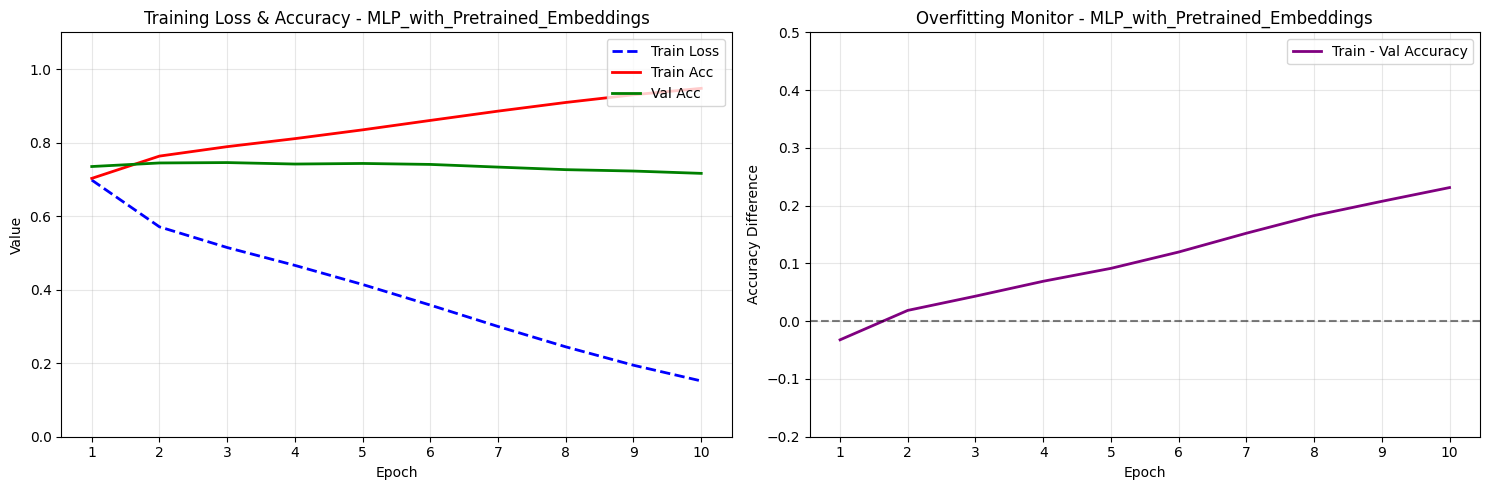


TRAINING SUMMARY
Model Name: MLP_with_Pretrained_Embeddings
Final Train Loss: 0.1517
Final Train Accuracy: 0.9476
Final Val Loss: 1.2474
Final Val Accuracy: 0.7164
Best Val Accuracy: 0.7457 (Epoch 3)
Final Overfitting Gap: 0.2313


In [20]:
# 绘制训练曲线
plot_training_curves("MLP_with_Pretrained_Embeddings", mlp_history)

# 打印训练摘要
print_training_summary("MLP_with_Pretrained_Embeddings", mlp_history)

Testing: 100%|██████████| 49057/49057 [00:39<00:00, 1230.79it/s]



TEST RESULTS
Model Name: MLP_with_pretrained_embeddings
Test Accuracy: 0.7213
Test Precision (weighted): 0.7169
Test Recall (weighted): 0.7213
Test F1 Score (weighted): 0.7188

Detailed Test Classification Report:
              precision    recall  f1-score   support

    Negative     0.7651    0.7500    0.7575     17953
     Neutral     0.4496    0.4118    0.4299      8037
    Positive     0.7724    0.8069    0.7893     23067

    accuracy                         0.7213     49057
   macro avg     0.6624    0.6562    0.6589     49057
weighted avg     0.7169    0.7213    0.7188     49057



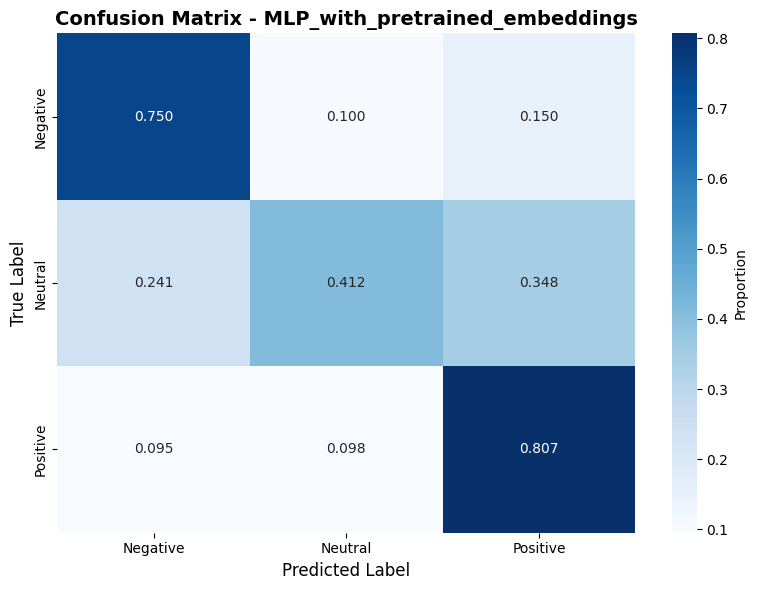


Per-Class Metrics:
------------------------------------------------------------
Negative: Precision=0.7651, Recall=0.7500, F1=0.7575, Support=17953
 Neutral: Precision=0.4496, Recall=0.4118, F1=0.4299, Support=8037
Positive: Precision=0.7724, Recall=0.8069, F1=0.7893, Support=23067


In [21]:
test_results = test_model_comprehensive(
    model=mlp_pre_emb,
    model_name="MLP_with_pretrained_embeddings",
    test_loader=test_data_loader_mlp,
    device=device,
    target_names=['Negative', 'Neutral', 'Positive']
)

In [22]:
from MyModule import CNN, collate_fn_cnn

train_data_loader_cnn = DataLoader(train_dataset, batch_size=batch_size, collate_fn=collate_fn_cnn, shuffle=True)
val_data_loader_cnn = DataLoader(val_dataset, batch_size=batch_size, collate_fn=collate_fn_cnn, shuffle=False)
test_data_loader_cnn = DataLoader(test_dataset, batch_size=1, collate_fn=collate_fn_cnn, shuffle=False)

# CNN 相关参数
filter_size = 3
num_filter = 100

# 加载模型
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
cnn_pre_emb = CNN(len(vocab), embedding_dim, filter_size, num_filter, num_class, embedding_matrix.clone().detach())
cnn_pre_emb.to(device)

CNN(
  (embedding): Embedding(33152, 200)
  (conv1d): Conv1d(200, 100, kernel_size=(3,), stride=(1,), padding=(1,))
  (linear): Linear(in_features=100, out_features=3, bias=True)
)

In [23]:
# 训练过程
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn_pre_emb.parameters(), lr=0.001)

cnn_history = train_model_with_validation(
    model=cnn_pre_emb,
    train_loader=train_data_loader_cnn,
    val_loader=val_data_loader_cnn,
    criterion=criterion,
    optimizer=optimizer,
    num_epochs=num_epoch,
    device=device
)

Training Epoch 1: 100%|██████████| 7155/7155 [00:31<00:00, 226.71it/s]


Epoch 1/10
    Train Loss: 0.6062	Train Accuracy: 0.7447
    Valid Loss: 0.5749	Valid Accuracy: 0.7599
    Valid Precision: 0.7476	Valid Recall: 0.7599	Valid F1: 0.7425
--------------------------------------------------------------------------------


Training Epoch 2: 100%|██████████| 7155/7155 [00:31<00:00, 229.12it/s]


Epoch 2/10
    Train Loss: 0.4769	Train Accuracy: 0.8062
    Valid Loss: 0.5655	Valid Accuracy: 0.7657
    Valid Precision: 0.7540	Valid Recall: 0.7657	Valid F1: 0.7569
--------------------------------------------------------------------------------


Training Epoch 3: 100%|██████████| 7155/7155 [00:31<00:00, 229.78it/s]


Epoch 3/10
    Train Loss: 0.3696	Train Accuracy: 0.8548
    Valid Loss: 0.6156	Valid Accuracy: 0.7571
    Valid Precision: 0.7551	Valid Recall: 0.7571	Valid F1: 0.7560
--------------------------------------------------------------------------------


Training Epoch 4: 100%|██████████| 7155/7155 [00:31<00:00, 229.73it/s]


Epoch 4/10
    Train Loss: 0.2632	Train Accuracy: 0.9018
    Valid Loss: 0.7495	Valid Accuracy: 0.7429
    Valid Precision: 0.7493	Valid Recall: 0.7429	Valid F1: 0.7448
--------------------------------------------------------------------------------


Training Epoch 5: 100%|██████████| 7155/7155 [00:31<00:00, 225.74it/s]


Epoch 5/10
    Train Loss: 0.1798	Train Accuracy: 0.9353
    Valid Loss: 0.9057	Valid Accuracy: 0.7356
    Valid Precision: 0.7394	Valid Recall: 0.7356	Valid F1: 0.7366
--------------------------------------------------------------------------------


Training Epoch 6: 100%|██████████| 7155/7155 [00:32<00:00, 221.30it/s]


Epoch 6/10
    Train Loss: 0.1254	Train Accuracy: 0.9562
    Valid Loss: 1.0592	Valid Accuracy: 0.7336
    Valid Precision: 0.7365	Valid Recall: 0.7336	Valid F1: 0.7347
--------------------------------------------------------------------------------


Training Epoch 7: 100%|██████████| 7155/7155 [00:31<00:00, 226.11it/s]


Epoch 7/10
    Train Loss: 0.0910	Train Accuracy: 0.9691
    Valid Loss: 1.2173	Valid Accuracy: 0.7312
    Valid Precision: 0.7329	Valid Recall: 0.7312	Valid F1: 0.7320
--------------------------------------------------------------------------------


Training Epoch 8: 100%|██████████| 7155/7155 [00:32<00:00, 222.16it/s]


Epoch 8/10
    Train Loss: 0.0698	Train Accuracy: 0.9767
    Valid Loss: 1.3400	Valid Accuracy: 0.7280
    Valid Precision: 0.7270	Valid Recall: 0.7280	Valid F1: 0.7274
--------------------------------------------------------------------------------


Training Epoch 9: 100%|██████████| 7155/7155 [00:31<00:00, 227.91it/s]


Epoch 9/10
    Train Loss: 0.0568	Train Accuracy: 0.9811
    Valid Loss: 1.4922	Valid Accuracy: 0.7254
    Valid Precision: 0.7245	Valid Recall: 0.7254	Valid F1: 0.7245
--------------------------------------------------------------------------------


Training Epoch 10: 100%|██████████| 7155/7155 [00:31<00:00, 227.81it/s]


Epoch 10/10
    Train Loss: 0.0477	Train Accuracy: 0.9849
    Valid Loss: 1.6174	Valid Accuracy: 0.7195
    Valid Precision: 0.7237	Valid Recall: 0.7195	Valid F1: 0.7209
--------------------------------------------------------------------------------

Detailed Classification Report:
              precision    recall  f1-score   support

    Negative     0.7892    0.7249    0.7557     17862
     Neutral     0.4222    0.4501    0.4357      8002
    Positive     0.7772    0.8083    0.7925     23165

    accuracy                         0.7195     49029
   macro avg     0.6629    0.6611    0.6613     49029
weighted avg     0.7237    0.7195    0.7209     49029



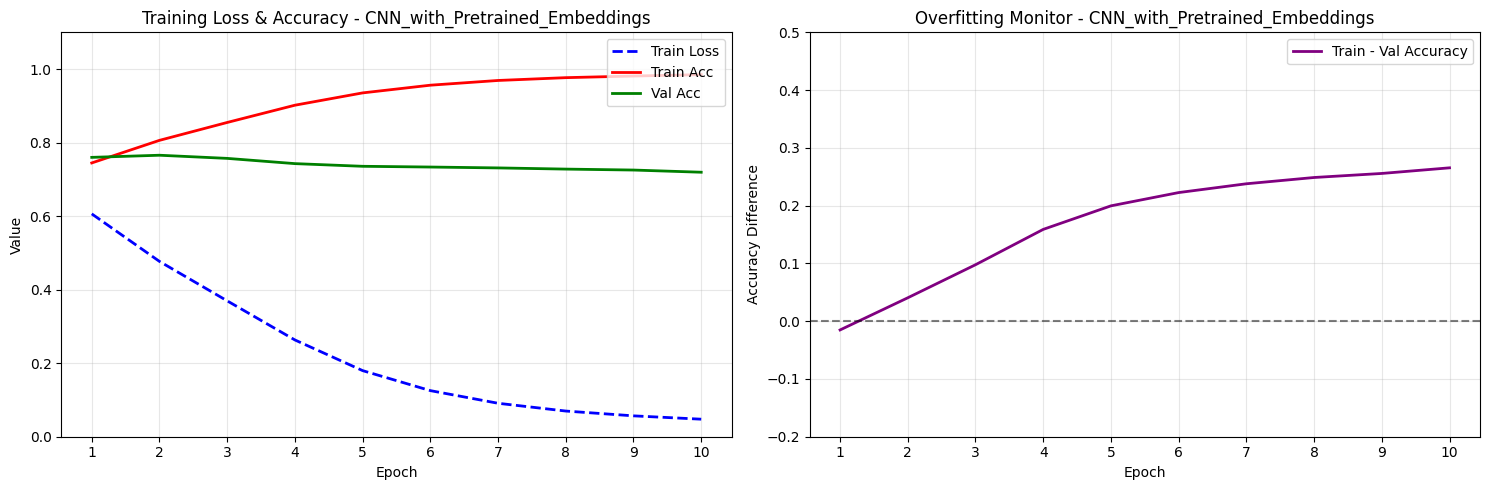


TRAINING SUMMARY
Model Name: CNN_with_Pretrained_Embeddings
Final Train Loss: 0.0477
Final Train Accuracy: 0.9849
Final Val Loss: 1.6174
Final Val Accuracy: 0.7195
Best Val Accuracy: 0.7657 (Epoch 2)
Final Overfitting Gap: 0.2655


In [24]:
# 绘制训练曲线
plot_training_curves("CNN_with_Pretrained_Embeddings", cnn_history)

# 打印训练摘要
print_training_summary("CNN_with_Pretrained_Embeddings", cnn_history)

Testing: 100%|██████████| 49057/49057 [00:53<00:00, 924.29it/s]



TEST RESULTS
Model Name: CNN with Pretrained Embeddings
Test Accuracy: 0.7190
Test Precision (weighted): 0.7146
Test Recall (weighted): 0.7190
Test F1 Score (weighted): 0.7159

Detailed Test Classification Report:
              precision    recall  f1-score   support

    Negative     0.7806    0.7358    0.7576     17953
     Neutral     0.4262    0.3899    0.4073      8037
    Positive     0.7637    0.8205    0.7911     23067

    accuracy                         0.7190     49057
   macro avg     0.6569    0.6487    0.6520     49057
weighted avg     0.7146    0.7190    0.7159     49057



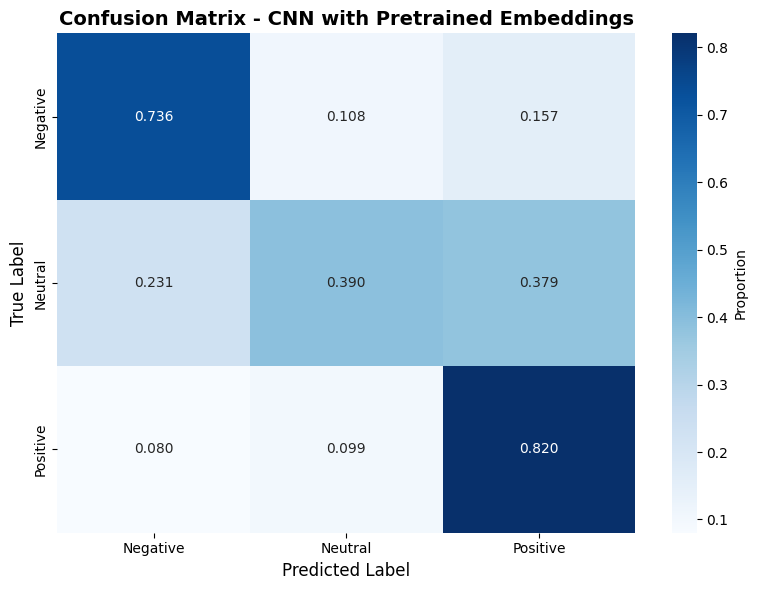


Per-Class Metrics:
------------------------------------------------------------
Negative: Precision=0.7806, Recall=0.7358, F1=0.7576, Support=17953
 Neutral: Precision=0.4262, Recall=0.3899, F1=0.4073, Support=8037
Positive: Precision=0.7637, Recall=0.8205, F1=0.7911, Support=23067


In [25]:
# CNN 测试过程 - 使用通用框架
cnn_test_results = test_model_comprehensive(
    model=cnn_pre_emb,
    model_name="CNN with Pretrained Embeddings",
    test_loader=test_data_loader_cnn,
    device=device
)

In [26]:
from MyModule import LSTM, collate_fn_lstm

train_data_loader_lstm = DataLoader(train_dataset, batch_size=batch_size, collate_fn=collate_fn_lstm, shuffle=True)
val_data_loader_lstm = DataLoader(val_dataset, batch_size=batch_size, collate_fn=collate_fn_lstm, shuffle=False)
test_data_loader_lstm = DataLoader(test_dataset, batch_size=1, collate_fn=collate_fn_lstm, shuffle=False)

# 加载模型
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
lstm_pre_emb = LSTM(len(vocab), embedding_dim, hidden_dim, num_class, embedding_matrix.clone().detach())
lstm_pre_emb.to(device)

LSTM(
  (embeddings): Embedding(33152, 200)
  (lstm): LSTM(200, 256, batch_first=True)
  (output): Linear(in_features=256, out_features=3, bias=True)
)

In [27]:
# 训练过程
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lstm_pre_emb.parameters(), lr=0.001)

lstm_history = train_model_with_validation(
    model=lstm_pre_emb,
    train_loader=train_data_loader_lstm,
    val_loader=val_data_loader_lstm,
    criterion=criterion,
    optimizer=optimizer,
    num_epochs=num_epoch,
    device=device
    )

Training Epoch 1: 100%|██████████| 7155/7155 [00:42<00:00, 168.88it/s]


Epoch 1/10
    Train Loss: 0.6111	Train Accuracy: 0.7422
    Valid Loss: 0.5570	Valid Accuracy: 0.7634
    Valid Precision: 0.7540	Valid Recall: 0.7634	Valid F1: 0.7564
--------------------------------------------------------------------------------


Training Epoch 2: 100%|██████████| 7155/7155 [00:41<00:00, 171.28it/s]


Epoch 2/10
    Train Loss: 0.4823	Train Accuracy: 0.8014
    Valid Loss: 0.5524	Valid Accuracy: 0.7693
    Valid Precision: 0.7586	Valid Recall: 0.7693	Valid F1: 0.7610
--------------------------------------------------------------------------------


Training Epoch 3: 100%|██████████| 7155/7155 [00:41<00:00, 172.80it/s]


Epoch 3/10
    Train Loss: 0.3918	Train Accuracy: 0.8411
    Valid Loss: 0.5953	Valid Accuracy: 0.7643
    Valid Precision: 0.7599	Valid Recall: 0.7643	Valid F1: 0.7616
--------------------------------------------------------------------------------


Training Epoch 4: 100%|██████████| 7155/7155 [00:38<00:00, 183.60it/s]


Epoch 4/10
    Train Loss: 0.3004	Train Accuracy: 0.8812
    Valid Loss: 0.6810	Valid Accuracy: 0.7567
    Valid Precision: 0.7483	Valid Recall: 0.7567	Valid F1: 0.7514
--------------------------------------------------------------------------------


Training Epoch 5: 100%|██████████| 7155/7155 [00:38<00:00, 185.92it/s]


Epoch 5/10
    Train Loss: 0.2149	Train Accuracy: 0.9160
    Valid Loss: 0.8329	Valid Accuracy: 0.7499
    Valid Precision: 0.7441	Valid Recall: 0.7499	Valid F1: 0.7467
--------------------------------------------------------------------------------


Training Epoch 6: 100%|██████████| 7155/7155 [00:38<00:00, 185.28it/s]


Epoch 6/10
    Train Loss: 0.1462	Train Accuracy: 0.9444
    Valid Loss: 1.0387	Valid Accuracy: 0.7428
    Valid Precision: 0.7416	Valid Recall: 0.7428	Valid F1: 0.7422
--------------------------------------------------------------------------------


Training Epoch 7: 100%|██████████| 7155/7155 [00:38<00:00, 185.57it/s]


Epoch 7/10
    Train Loss: 0.0985	Train Accuracy: 0.9632
    Valid Loss: 1.2939	Valid Accuracy: 0.7373
    Valid Precision: 0.7328	Valid Recall: 0.7373	Valid F1: 0.7349
--------------------------------------------------------------------------------


Training Epoch 8: 100%|██████████| 7155/7155 [00:38<00:00, 186.17it/s]


Epoch 8/10
    Train Loss: 0.0680	Train Accuracy: 0.9755
    Valid Loss: 1.4605	Valid Accuracy: 0.7338
    Valid Precision: 0.7325	Valid Recall: 0.7338	Valid F1: 0.7328
--------------------------------------------------------------------------------


Training Epoch 9: 100%|██████████| 7155/7155 [00:38<00:00, 186.06it/s]


Epoch 9/10
    Train Loss: 0.0489	Train Accuracy: 0.9828
    Valid Loss: 1.6189	Valid Accuracy: 0.7309
    Valid Precision: 0.7298	Valid Recall: 0.7309	Valid F1: 0.7302
--------------------------------------------------------------------------------


Training Epoch 10: 100%|██████████| 7155/7155 [00:38<00:00, 185.86it/s]


Epoch 10/10
    Train Loss: 0.0384	Train Accuracy: 0.9867
    Valid Loss: 1.7359	Valid Accuracy: 0.7296
    Valid Precision: 0.7290	Valid Recall: 0.7296	Valid F1: 0.7292
--------------------------------------------------------------------------------

Detailed Classification Report:
              precision    recall  f1-score   support

    Negative     0.7784    0.7672    0.7728     17862
     Neutral     0.4376    0.4338    0.4357      8002
    Positive     0.7915    0.8028    0.7971     23165

    accuracy                         0.7296     49029
   macro avg     0.6692    0.6679    0.6685     49029
weighted avg     0.7290    0.7296    0.7292     49029



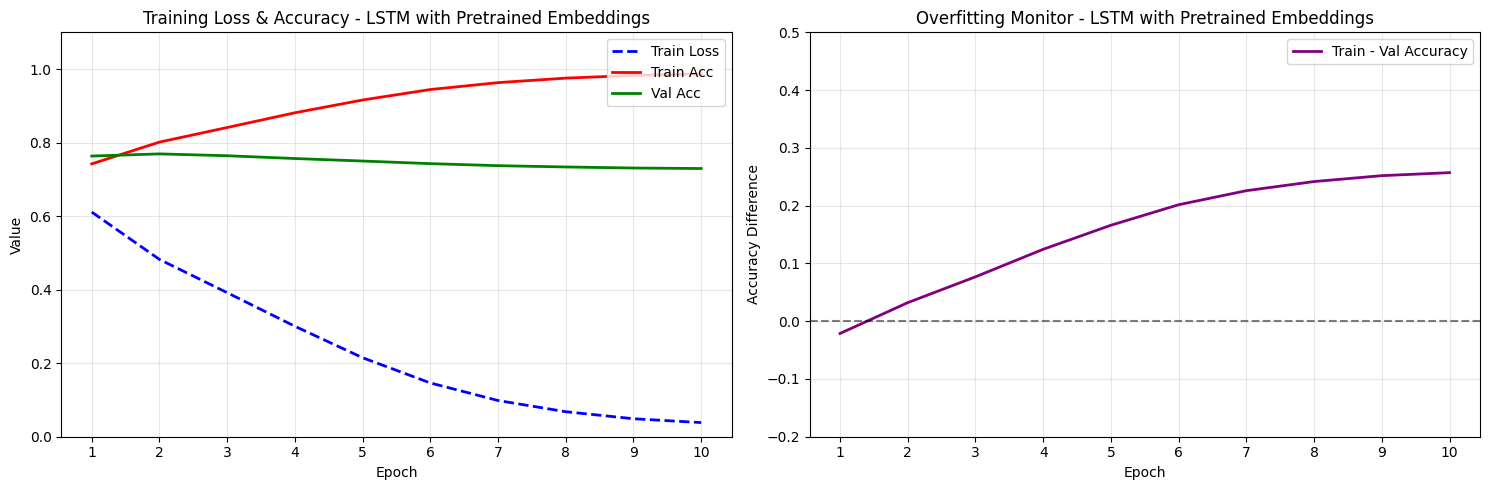


TRAINING SUMMARY
Model Name: LSTM with Pretrained Embeddings
Final Train Loss: 0.0384
Final Train Accuracy: 0.9867
Final Val Loss: 1.7359
Final Val Accuracy: 0.7296
Best Val Accuracy: 0.7693 (Epoch 2)
Final Overfitting Gap: 0.2571


In [28]:
# 绘制训练曲线
plot_training_curves("LSTM with Pretrained Embeddings", lstm_history)

# 打印训练摘要
print_training_summary("LSTM with Pretrained Embeddings", lstm_history)

Testing: 100%|██████████| 49057/49057 [01:09<00:00, 704.80it/s]



TEST RESULTS
Model Name: LSTM with Pretrained Embeddings
Test Accuracy: 0.7361
Test Precision (weighted): 0.7335
Test Recall (weighted): 0.7361
Test F1 Score (weighted): 0.7347

Detailed Test Classification Report:
              precision    recall  f1-score   support

    Negative     0.7796    0.7769    0.7782     17953
     Neutral     0.4533    0.4325    0.4426      8037
    Positive     0.7953    0.8101    0.8026     23067

    accuracy                         0.7361     49057
   macro avg     0.6760    0.6732    0.6745     49057
weighted avg     0.7335    0.7361    0.7347     49057



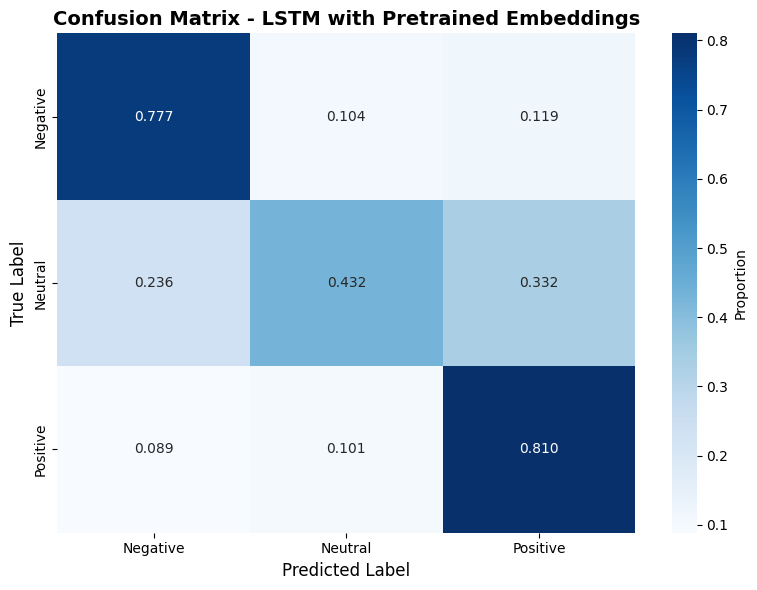


Per-Class Metrics:
------------------------------------------------------------
Negative: Precision=0.7796, Recall=0.7769, F1=0.7782, Support=17953
 Neutral: Precision=0.4533, Recall=0.4325, F1=0.4426, Support=8037
Positive: Precision=0.7953, Recall=0.8101, F1=0.8026, Support=23067


In [29]:
# LSTM 测试过程 - 使用通用框架
lstm_test_results = test_model_comprehensive(
    model=lstm_pre_emb,
    model_name="LSTM with Pretrained Embeddings", 
    test_loader=test_data_loader_lstm,
    device=device
)

In [6]:
from MyModule import Transformer, collate_fn_trans

train_data_loader_trans = DataLoader(train_dataset, batch_size=batch_size, collate_fn=collate_fn_trans, shuffle=True)
val_data_loader_trans = DataLoader(val_dataset, batch_size=batch_size, collate_fn=collate_fn_trans, shuffle=False)
test_data_loader_trans = DataLoader(test_dataset, batch_size=1, collate_fn=collate_fn_trans, shuffle=False)

# 加载模型
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
transformer_pre_emb = Transformer(len(vocab), embedding_dim, num_class, pretrained_embedding_matrix=embedding_matrix.clone().detach())
transformer_pre_emb.to(device)

Transformer(
  (embeddings): Embedding(33152, 200)
  (position_embedding): PositionalEncoding()
  (transformer): TransformerEncoder(
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=200, out_features=200, bias=True)
        )
        (linear1): Linear(in_features=200, out_features=512, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=512, out_features=200, bias=True)
        (norm1): LayerNorm((200,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((200,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (output): Linear(in_features=200, out_features=3, bias=True)
)

In [9]:

# 训练过程
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(transformer_pre_emb.parameters(), lr=0.001)

transformer_history = train_model_with_validation(
    model=transformer_pre_emb,
    train_loader=train_data_loader_trans,
    val_loader=val_data_loader_trans,
    criterion=criterion,
    optimizer=optimizer,
    num_epochs=num_epoch,
    device=device
)

Training Epoch 1: 100%|██████████| 7155/7155 [00:56<00:00, 127.52it/s]


Epoch 1/10
    Train Loss: 0.7739	Train Accuracy: 0.6731
    Valid Loss: 0.7526	Valid Accuracy: 0.6860
    Valid Precision: 0.6511	Valid Recall: 0.6860	Valid F1: 0.6579
--------------------------------------------------------------------------------


Training Epoch 2: 100%|██████████| 7155/7155 [00:55<00:00, 129.65it/s]


Epoch 2/10
    Train Loss: 0.7543	Train Accuracy: 0.6897
    Valid Loss: 0.7305	Valid Accuracy: 0.7005
    Valid Precision: 0.6832	Valid Recall: 0.7005	Valid F1: 0.6837
--------------------------------------------------------------------------------


Training Epoch 3: 100%|██████████| 7155/7155 [00:55<00:00, 128.76it/s]


Epoch 3/10
    Train Loss: 0.7166	Train Accuracy: 0.7083
    Valid Loss: 0.7265	Valid Accuracy: 0.6995
    Valid Precision: 0.6852	Valid Recall: 0.6995	Valid F1: 0.6878
--------------------------------------------------------------------------------


Training Epoch 4: 100%|██████████| 7155/7155 [00:52<00:00, 135.60it/s]


Epoch 4/10
    Train Loss: 0.7086	Train Accuracy: 0.7107
    Valid Loss: 0.7384	Valid Accuracy: 0.6928
    Valid Precision: 0.6803	Valid Recall: 0.6928	Valid F1: 0.6810
--------------------------------------------------------------------------------


Training Epoch 5: 100%|██████████| 7155/7155 [00:51<00:00, 138.97it/s]


Epoch 5/10
    Train Loss: 0.6841	Train Accuracy: 0.7221
    Valid Loss: 0.7280	Valid Accuracy: 0.7011
    Valid Precision: 0.6860	Valid Recall: 0.7011	Valid F1: 0.6846
--------------------------------------------------------------------------------


Training Epoch 6: 100%|██████████| 7155/7155 [00:51<00:00, 138.73it/s]


Epoch 6/10
    Train Loss: 0.6659	Train Accuracy: 0.7281
    Valid Loss: 0.7162	Valid Accuracy: 0.7051
    Valid Precision: 0.6882	Valid Recall: 0.7051	Valid F1: 0.6850
--------------------------------------------------------------------------------


Training Epoch 7: 100%|██████████| 7155/7155 [00:51<00:00, 138.66it/s]


Epoch 7/10
    Train Loss: 0.6493	Train Accuracy: 0.7362
    Valid Loss: 0.7223	Valid Accuracy: 0.7067
    Valid Precision: 0.6957	Valid Recall: 0.7067	Valid F1: 0.6962
--------------------------------------------------------------------------------


Training Epoch 8: 100%|██████████| 7155/7155 [00:51<00:00, 138.27it/s]


Epoch 8/10
    Train Loss: 0.6352	Train Accuracy: 0.7418
    Valid Loss: 0.7465	Valid Accuracy: 0.6934
    Valid Precision: 0.6948	Valid Recall: 0.6934	Valid F1: 0.6909
--------------------------------------------------------------------------------


Training Epoch 9: 100%|██████████| 7155/7155 [00:51<00:00, 138.32it/s]


Epoch 9/10
    Train Loss: 0.6281	Train Accuracy: 0.7447
    Valid Loss: 0.7136	Valid Accuracy: 0.7073
    Valid Precision: 0.6936	Valid Recall: 0.7073	Valid F1: 0.6980
--------------------------------------------------------------------------------


Training Epoch 10: 100%|██████████| 7155/7155 [00:53<00:00, 134.86it/s]


Epoch 10/10
    Train Loss: 0.6134	Train Accuracy: 0.7509
    Valid Loss: 0.7127	Valid Accuracy: 0.7063
    Valid Precision: 0.7022	Valid Recall: 0.7063	Valid F1: 0.7015
--------------------------------------------------------------------------------

Detailed Classification Report:
              precision    recall  f1-score   support

    Negative     0.6964    0.8142    0.7507     17862
     Neutral     0.4480    0.3674    0.4037      8002
    Positive     0.7944    0.7401    0.7663     23165

    accuracy                         0.7063     49029
   macro avg     0.6463    0.6406    0.6403     49029
weighted avg     0.7022    0.7063    0.7015     49029



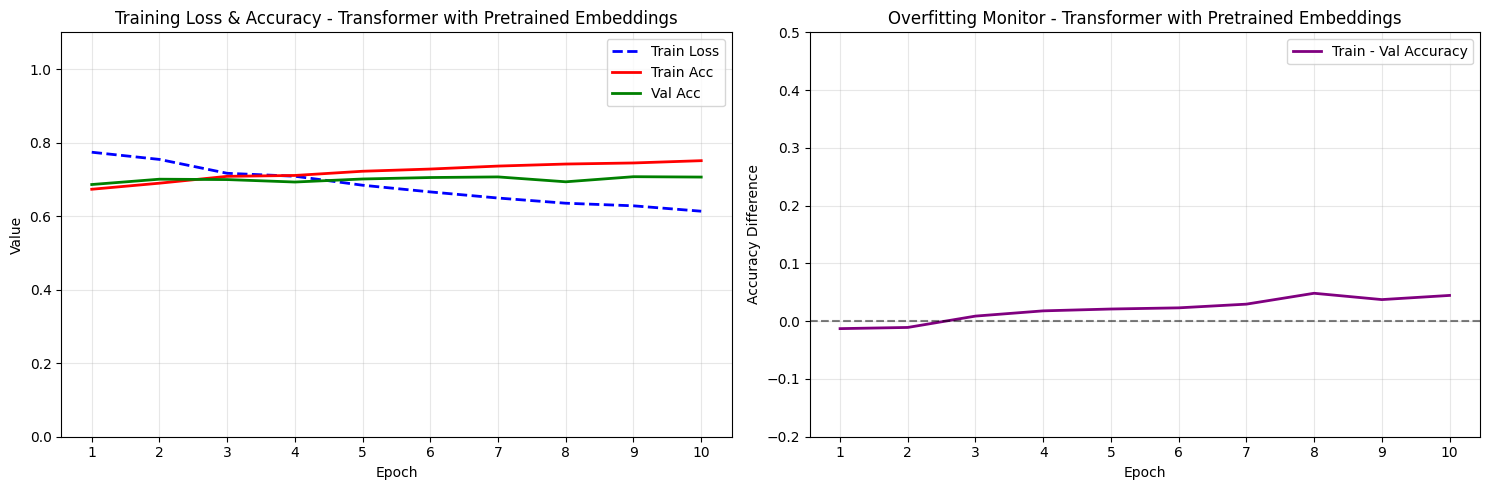


TRAINING SUMMARY
Model Name: Transformer with Pretrained Embeddings with Pretrained Embeddings
Final Train Loss: 0.6134
Final Train Accuracy: 0.7509
Final Val Loss: 0.7127
Final Val Accuracy: 0.7063
Best Val Accuracy: 0.7073 (Epoch 9)
Final Overfitting Gap: 0.0446


In [10]:
# 绘制训练曲线
plot_training_curves("Transformer with Pretrained Embeddings", transformer_history)

# 打印训练摘要
print_training_summary("Transformer with Pretrained Embeddings with Pretrained Embeddings", transformer_history)

Testing: 100%|██████████| 49057/49057 [01:48<00:00, 452.04it/s]



TEST RESULTS
Model Name: Transformer with Pretrained Embeddings
Test Accuracy: 0.7055
Test Precision (weighted): 0.7007
Test Recall (weighted): 0.7055
Test F1 Score (weighted): 0.7002

Detailed Test Classification Report:
              precision    recall  f1-score   support

    Negative     0.6963    0.8159    0.7513     17953
     Neutral     0.4472    0.3612    0.3996      8037
    Positive     0.7924    0.7396    0.7651     23067

    accuracy                         0.7055     49057
   macro avg     0.6453    0.6389    0.6387     49057
weighted avg     0.7007    0.7055    0.7002     49057



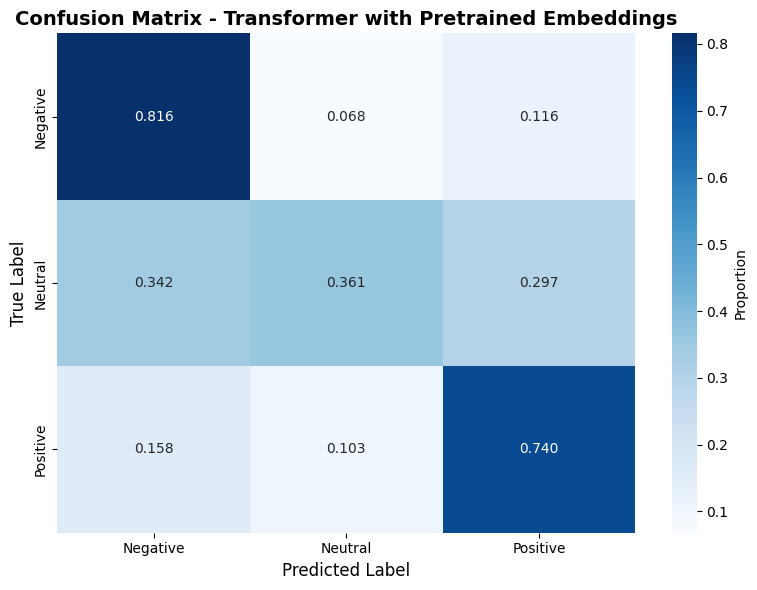


Per-Class Metrics:
------------------------------------------------------------
Negative: Precision=0.6963, Recall=0.8159, F1=0.7513, Support=17953
 Neutral: Precision=0.4472, Recall=0.3612, F1=0.3996, Support=8037
Positive: Precision=0.7924, Recall=0.7396, F1=0.7651, Support=23067


In [11]:
# Transformer 测试过程 - 使用通用框架
transformer_test_results = test_model_comprehensive(
    model=transformer_pre_emb,
    model_name="Transformer with Pretrained Embeddings",
    test_loader=test_data_loader_trans,
    device=device
)